In [1]:
import numpy as np
import os
from scipy.interpolate import interp1d
import cv2
from glob import glob as g
import matplotlib.pyplot as plt

In [2]:
names = g('outputs/*png')
names

['outputs\\Lane Mask.png',
 'outputs\\Lane Mask2.png',
 'outputs\\Lane Mask3.png',
 'outputs\\Lane Mask4.png',
 'outputs\\Lane Mask5.png',
 'outputs\\Lane Mask6.png',
 'outputs\\Lane Mask7.png']

outputs\Lane Mask6.png


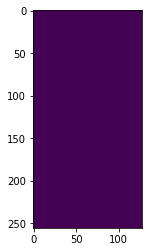

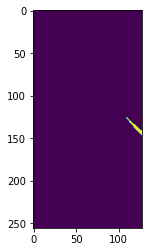

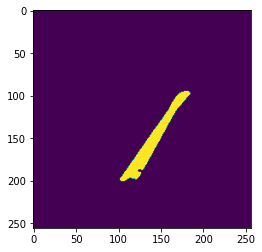

In [3]:
# img = np.load(names[0])
i = 5
print(names[i])
img = cv2.imread(names[i])[...,0]
img = cv2.medianBlur(img , 3)
img_white, img_yellow = np.split(img, 2, axis = 0)
img_l = img_white[:,:128]
img_r = img_white[:,128:]

plt.imshow(img_l)
plt.show()
plt.imshow(img_r)
plt.show()
plt.imshow(img_yellow)
plt.show()

In [4]:
# contours, hierarchy = cv2.findContours(img, 
#     cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# img = cv2.drawContours(img, contours, -1, (255, 255, 255), -1)

# plt.imshow(img)

(0.0, 255.0)

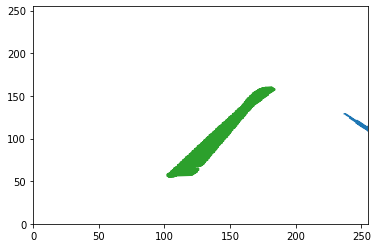

In [5]:
img_where = np.argwhere(img_l)
x_l = img_where[:, 1]
y_l = 255 - img_where[:, 0]

img_where = np.argwhere(img_r)
x_r = img_where[:, 1] + 128
y_r = 255 - img_where[:, 0]

img_where = np.argwhere(img_yellow)
x = img_where[:, 1]
y = 255 - img_where[:, 0]

plt.plot(x_r, y_r)
plt.plot(x_l, y_l)
plt.plot(x, y)

plt.xlim([0, 255])
plt.ylim([0,255])

In [6]:
# To detect if we are on the right lane or the left lane
print(img_l.mean())
print(img_r.mean())
print(img_yellow.mean())

0.0
0.560302734375
6.05438232421875


In [7]:
print(np.mean(np.where(img_yellow[120:150,:]>0), axis=1)[1])
print(np.mean(np.where(img_white[120:150,:]>0), axis=1)[1])
print((151 + 257) / 2)

151.31466666666665
247.91666666666666
204.0


In [8]:
def interval_avg(x,y):
    num_samples = 10
    if not x.size:
        return None
    step = (x.max() - x.min()) // num_samples
    argsort = np.argsort(x)
    x = x[argsort]
    y = y[argsort]
    intervals = np.arange(x.min(), x.max(), step)
    avgs_x = []
    avgs_y = []
    for i, inter in enumerate(intervals[:-1]):
        avg_y = np.mean(y[(x<intervals[i+1]) & (x>intervals[i])])
        avg_x = np.mean(x[(x<intervals[i+1]) & (x>intervals[i])])
        avgs_x.append(avg_x)
        avgs_y.append(avg_y)
    return [np.array(avgs_x), np.array(avgs_y)]

C:\Users\Milad\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Milad\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


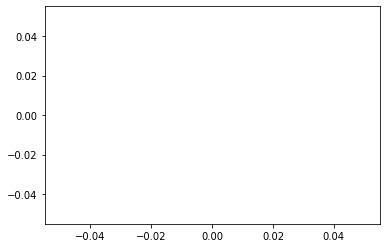

In [9]:
# %%timeit
out = interval_avg(x_r,y_r)
plt.plot(out[0], out[1])

In [10]:
out = interval_avg(x_l,y_l)
out[0] = out[0][~np.isnan(out[0])]
out[1] = out[1][~np.isnan(out[1])]

dx = np.gradient(out[0])
dy = np.gradient(out[1])
dy_dx = dy / dx

angles = np.rad2deg(np.arctan(dy_dx))
print(angles)
# print('\nStd : ', angles.std())
# print('Mean : ', angles.mean())

dx_white = out[0][-1] - out[0][0]
dy_white = out[1][-1] - out[1][0]
m_white = dy_yellow / dx_yellow

TypeError: 'NoneType' object is not subscriptable

In [11]:
out = interval_avg(x_r,y_r)
out[0] = out[0][~np.isnan(out[0])]
out[1] = out[1][~np.isnan(out[1])]

dx = np.gradient(out[0])
dy = np.gradient(out[1])
dy_dx = dy / dx

angles = np.rad2deg(np.arctan(dy_dx))
print(angles)
# print('\nStd : ', angles.std())
# print('Mean : ', angles.mean())

dx_white = out[0][-1] - out[0][0]
dy_white = out[1][-1] - out[1][0]
m_white = dy_yellow / dx_yellow

C:\Users\Milad\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Milad\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.

In [12]:
x_r

array([237, 238, 238, 239, 239, 240, 240, 241, 241, 242, 241, 242, 243,
       242, 243, 244, 243, 244, 245, 244, 245, 246, 247, 245, 246, 247,
       248, 246, 247, 248, 249, 246, 247, 248, 249, 250, 247, 248, 249,
       250, 251, 248, 249, 250, 251, 252, 249, 250, 251, 252, 253, 250,
       251, 252, 253, 254, 255, 251, 252, 253, 254, 255, 252, 253, 254,
       255, 253, 254, 255, 254, 255, 255], dtype=int64)

In [13]:
y_r

array([129, 129, 128, 128, 127, 127, 126, 126, 125, 125, 124, 124, 124,
       123, 123, 123, 122, 122, 122, 121, 121, 121, 121, 120, 120, 120,
       120, 119, 119, 119, 119, 118, 118, 118, 118, 118, 117, 117, 117,
       117, 117, 116, 116, 116, 116, 116, 115, 115, 115, 115, 115, 114,
       114, 114, 114, 114, 114, 113, 113, 113, 113, 113, 112, 112, 112,
       112, 111, 111, 111, 110, 110, 109], dtype=int64)

In [14]:
interval_avg(x_r,y_r)

[array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan])]

In [15]:
out = interval_avg(x,y)
out[0] = out[0][~np.isnan(out[0])]
out[1] = out[1][~np.isnan(out[1])]

dx = np.gradient(out[0])
dy = np.gradient(out[1])
dy_dx = dy / dx

angles = np.rad2deg(np.arctan(dy_dx))
print(angles)
print('\nStd : ', angles.std())
print('Mean : ', angles.mean())

dx_yellow = out[0][-1] - out[0][0]
dy_yellow = out[1][-1] - out[1][0]
m_yellow = dy_yellow / dx_yellow

[42.63975873 40.22282522 48.12752741 56.49501576 57.76102801 58.1086701
 59.07697704 58.15173679 49.64464698 40.33504362]

Std :  7.434134573182254
Mean :  51.0563229663574


In [ ]:
len(out[0])

In [ ]:
dx_yellow = out[0][-1] - out[0][0]
dy_yellow = out[1][-1] - out[1][0]
m_yellow = dy_yellow / dx_yellow

In [ ]:
dx_yellow

In [ ]:
dy_yellow

In [ ]:
m_yellow

In [ ]:
m_white

In [ ]:
dx_white

In [ ]:
a = np.array([1,2,np.nan])
np.nan_to_num(a)

In [ ]:
a

In [ ]:
(np.round(1.4)) == 1

In [ ]:
np.round(1451, -2)